In [12]:
from jmetal.algorithm.multiobjective.gde3 import GDE3
from jmetal.algorithm.multiobjective.nsgaii import NSGAII
from jmetal.algorithm.multiobjective.smpso import SMPSO
from jmetal.core.quality_indicator import *
from jmetal.lab.experiment import Experiment, Job, generate_summary_from_experiment
from jmetal.operator import PolynomialMutation, SBXCrossover
from jmetal.problem import ZDT1, ZDT2, ZDT3
from jmetal.util.archive import CrowdingDistanceArchive
from jmetal.util.termination_criterion import StoppingByEvaluations
from jmetal.lab.experiment import generate_boxplot, generate_latex_tables, compute_mean_indicator, compute_wilcoxon
from jmetal.lab.statistical_test.bayesian import *
from jmetal.lab.statistical_test.functions import *
from jmetal.lab.visualization import CDplot, plot_posterior

In [13]:
def configure_experiment(problems: dict, n_run: int):
    jobs = []
    max_evaluations = 25000

    for run in range(n_run):
        for problem_tag, problem in problems.items():
            # jobs.append(
            #     Job(
            #         algorithm=NSGAII(
            #             problem=problem,
            #             population_size=100,
            #             offspring_population_size=100,
            #             mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables,
            #                                         distribution_index=20),
            #             crossover=SBXCrossover(probability=1.0, distribution_index=20),
            #             termination_criterion=StoppingByEvaluations(max=max_evaluations)
            #         ),
            #         algorithm_tag='NSGAII',
            #         problem_tag=problem_tag,
            #         run=run,
            #     )
            # )
            # jobs.append(
            #     Job(
            #         algorithm=GDE3(
            #             problem=problem,
            #             population_size=100,
            #             cr=0.5,
            #             f=0.5,
            #             termination_criterion=StoppingByEvaluations(max=max_evaluations)
            #         ),
            #         algorithm_tag='GDE3',
            #         problem_tag=problem_tag,
            #         run=run,
            #     )
            # )
            jobs.append(
                Job(
                    algorithm=SMPSO(
                        problem=problem,
                        swarm_size=100,
                        mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables,
                                                    distribution_index=20),
                        leaders=CrowdingDistanceArchive(100),
                        termination_criterion=StoppingByEvaluations(max_evaluations=max_evaluations)
                    ),
                    algorithm_tag='SMPSO',
                    problem_tag=problem_tag,
                    run=run,
                )
            )

    return jobs

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# Configure the experiments
jobs = configure_experiment(problems={'ZDT1': ZDT1(), 'ZDT2': ZDT2(), 'ZDT3': ZDT3()}, n_run=31)

# Run the study
output_directory = 'data'
experiment = Experiment(output_dir=output_directory, jobs=jobs)
experiment.run()

2023-08-26 16:10:39,482 [MainThread  ] [INFO ]  Output file (function values): data/SMPSO/ZDT1/FUN.0.tsv
2023-08-26 16:10:39,483 [MainThread  ] [INFO ]  Output file (variables): data/SMPSO/ZDT1/VAR.0.tsv
2023-08-26 16:10:43,609 [MainThread  ] [INFO ]  Output file (function values): data/SMPSO/ZDT2/FUN.0.tsv
2023-08-26 16:10:43,611 [MainThread  ] [INFO ]  Output file (variables): data/SMPSO/ZDT2/VAR.0.tsv
2023-08-26 16:10:45,975 [MainThread  ] [INFO ]  Output file (function values): data/SMPSO/ZDT3/FUN.0.tsv
2023-08-26 16:10:45,977 [MainThread  ] [INFO ]  Output file (variables): data/SMPSO/ZDT3/VAR.0.tsv
2023-08-26 16:10:49,955 [MainThread  ] [INFO ]  Output file (function values): data/SMPSO/ZDT1/FUN.1.tsv
2023-08-26 16:10:49,956 [MainThread  ] [INFO ]  Output file (variables): data/SMPSO/ZDT1/VAR.1.tsv
2023-08-26 16:10:53,782 [MainThread  ] [INFO ]  Output file (function values): data/SMPSO/ZDT2/FUN.1.tsv
2023-08-26 16:10:53,783 [MainThread  ] [INFO ]  Output file (variables): data/S

In [16]:
# experiment = ...

# Generate summary file
generate_summary_from_experiment(
    input_dir=output_directory,
    reference_fronts='/home/anuj/Documents/jMetalPy/resources/reference_front',
    quality_indicators=[GenerationalDistance(), EpsilonIndicator(), HyperVolume([1.0, 1.0])]
)

this is front [[4.460983726861656e-08, 1.0008588970425578], [0.9999651996270493, 0.0005529266247160953], [0.6074558677615514, 0.2212159442188773], [0.5833946003588839, 0.24222340290759492], [0.35122347394910164, 0.4083080187903196], [0.3747617516170936, 0.38866225064022564], [0.9377815236017463, 0.03424866608867388], [0.6532147962224124, 0.19449294512699328], [0.08643308817544945, 0.706990123521202], [0.40903205240208795, 0.361064688385609], [0.21888837168868636, 0.5330288810836812], [0.4921339627166744, 0.29919346279916026], [0.32188543040185535, 0.4337940056037635], [0.4267924426841379, 0.34740342200727037], [0.002686344861006107, 0.9492501696642469], [0.9073257809427664, 0.04884211632223853], [0.17508965707899177, 0.5822316907726875], [0.20629290279315607, 0.5466786994184754], [0.23570603120419834, 0.5221281537130045], [0.07380670257099592, 0.7290214206885164], [0.6304565811836789, 0.20688023239871953], [0.30229905166888305, 0.4519615543833791], [0.10676395128622618, 0.6748592002867

2023-08-26 16:29:23,799 [MainThread  ] [WARNI]  Directory latex/statistical exists. Removing contents.
2023-08-26 16:29:23,845 [MainThread  ] [WARNI]  Directory boxplot exists. Removing contents.
2023-08-26 16:29:25,299 [MainThread  ] [WARNI]  Directory latex/wilcoxon exists. Removing contents.


        NSGAII     SMPSO
ZDT1  0.659418  0.661788
ZDT3       NaN  1.040909
ZDT2       NaN  0.328577
-------- Sign Test --------
         Results
Num X<Y      1.0
Num X>Y      0.0
p-value      1.0
-------- Friedman Test --------
                      Results
Friedman-statistic -10.333333
p-value              1.000000
-------- Friedman Aligned Rank Test --------
                    Results
Aligned Rank stat -2.369697
p-value            1.000000
-------- Quade Test --------
                       Results
Quade Test statistic  2.500000
p-value               0.254644
-------- Friedman Post-Hoc Test --------
z values 
         NSGAII    SMPSO
NSGAII     0.0  0.57735
p-values 
         NSGAII     SMPSO
NSGAII     1.0  0.563703
adjusted p-values 
                  Bonferroni
NSGAII vs SMPSO    0.563703
-------- Friedman Aligned Rank Post-Hoc Test --------
z values 
           NSGAII     SMPSO
NSGAII  0.000000  0.288675
SMPSO   0.288675  0.000000
p-values 
          NSGAII    SMPSO
NSGAII  1.00

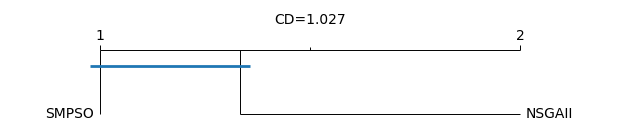

-------- Bayesian Sign Test --------


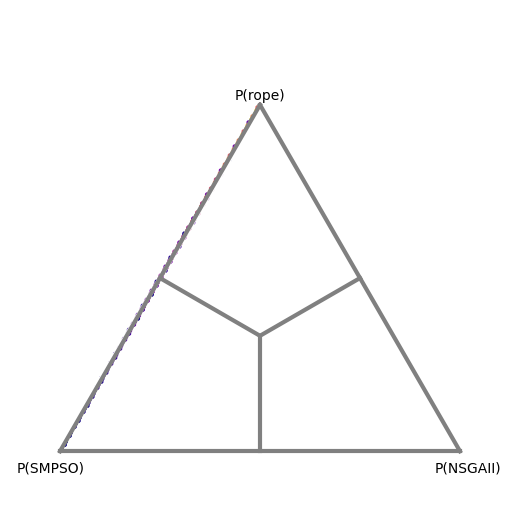

Pr(NSGAII < SMPSO) = 0.178
Pr(NSGAII ~= SMPSO) = 0.822
Pr(NSGAII > SMPSO) = 0.000
-------- Bayesian Signed Rank Test --------


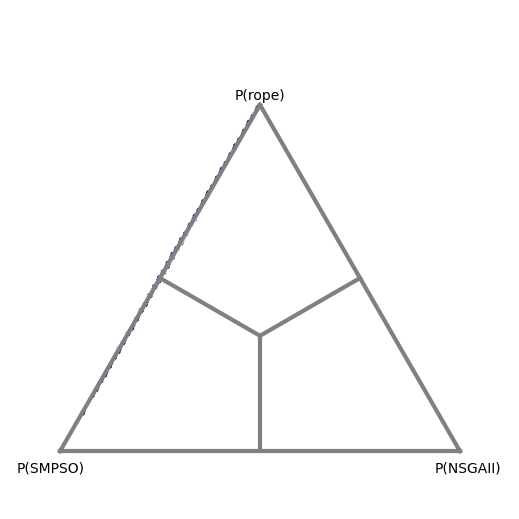

Pr(NSGAII < SMPSO) = 0.046
Pr(NSGAII ~= SMPSO) = 0.954
Pr(NSGAII > SMPSO) = 0.000


In [23]:
# Generate Median & IQR tables
generate_latex_tables(filename='QualityIndicatorSummary.csv')

# Generate boxplots
generate_boxplot(filename='QualityIndicatorSummary.csv')

# Wilcoxon
compute_wilcoxon(filename='QualityIndicatorSummary.csv')

# Statistical lab

avg = compute_mean_indicator(filename='QualityIndicatorSummary.csv', indicator_name='HV')
print(avg)

# Non-parametric test
print('-------- Sign Test --------')
print(sign_test(avg[['NSGAII', 'SMPSO']]))
print('-------- Friedman Test --------')
print(friedman_test(avg))
print('-------- Friedman Aligned Rank Test --------')
print(friedman_aligned_rank_test(avg))
print('-------- Quade Test --------')
print(quade_test(avg))

# Post-hoc tests
print('-------- Friedman Post-Hoc Test --------')
z, p_val, adj_pval = friedman_ph_test(avg, control=0, apv_procedure='Bonferroni')
print('z values \n', z)
print('p-values \n', p_val)
print('adjusted p-values \n', adj_pval)
print('-------- Friedman Aligned Rank Post-Hoc Test --------')
z, p_val, adj_pval = friedman_aligned_ph_test(avg, apv_procedure='Shaffer')
print('z values \n', z)
print('p-values \n', p_val)
print('adjusted p-values \n', adj_pval)
print('-------- QuadeTest Post-Hoc Test --------')
z, p_val, adj_pval = quade_ph_test(avg, apv_procedure='Holm')
print('z values \n', z)
print('p-values \n', p_val)
print('adjusted p-values \n', adj_pval)

# Plot critical distance

CDplot(avg.T, alpha=0.15, higher_is_better=True)

print('-------- Bayesian Sign Test --------')
bst, DProcess = bayesian_sign_test(avg[['NSGAII', 'SMPSO']], rope_limits=[-0.002, 0.002],
                                    prior_strength=0.5, return_sample=True)
plot_posterior(DProcess, higher_is_better=True, alg_names=['NSGAII', 'SMPSO'])

print('Pr(NSGAII < SMPSO) = %.3f' % bst[0])
print('Pr(NSGAII ~= SMPSO) = %.3f' % bst[1])
print('Pr(NSGAII > SMPSO) = %.3f' % bst[2])

print('-------- Bayesian Signed Rank Test --------')
bst, DProcess = bayesian_signed_rank_test(avg[['NSGAII', 'SMPSO']], rope_limits=[-0.002, 0.002],
                                            prior_strength=0.5, return_sample=True)
plot_posterior(DProcess, higher_is_better=True, alg_names=['NSGAII', 'SMPSO'])

print('Pr(NSGAII < SMPSO) = %.3f' % bst[0])
print('Pr(NSGAII ~= SMPSO) = %.3f' % bst[1])
print('Pr(NSGAII > SMPSO) = %.3f' % bst[2])